# Hw1_成都租房价格数据分析与可视化

## 1 读取数据

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

file_data=pd.read_csv('./chengdu_rent_1.csv')

In [293]:
file_data.head()

,Title,Price,Area,Region,Link
0,整租·悦彩广场 1室1厅 东,1700 元/月,36.81㎡,温江-温江大学城-悦彩广场,https://cd.lianjia.com/zufang/CD19559224339154...
1,整租·天府半岛七期 3室2厅 西南,1900 元/月,91.28㎡,天府新区-锦江生态带-天府半岛七期,https://cd.lianjia.com/zufang/CD19554644353634...
2,整租·翡翠城四期 3室1厅 东南,3300 元/月,87.99㎡,锦江-东湖-翡翠城四期,https://cd.lianjia.com/zufang/CD16993487308864...
3,独栋·龙湖冠寓 成都滨江天街店 【国庆钜惠】东郊记忆3一个月起租可月付短租 0中介今日可看房 开间,1891-2180 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
4,整租·蓝光T-max 3室2厅 南/西南,3200 元/月,132.52㎡,双流-航空港-蓝光T-max,https://cd.lianjia.com/zufang/CD19558896193125...


In [294]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   101 non-null    object
 1   Price   101 non-null    object
 2   Area    101 non-null    object
 3   Region  101 non-null    object
 4   Link    101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [295]:
file_data.describe()

,Title,Price,Area,Region,Link
count,101,101,101,101,101
unique,89,56,82,83,86
top,整租·宗申流溪别院 3室1厅 东南,1700 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
freq,3,7,4,4,4


In [296]:
file_data.columns

Index(['Title', 'Price', 'Area', 'Region', 'Link'], dtype='object')

## 2 数据预处理

### 2.1 删除重复值、空值

In [297]:
# 检查是否有重复数据
file_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99      True
100    False
Length: 101, dtype: bool

In [298]:
# 检查是否有重复数据
file_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99      True
100    False
Length: 101, dtype: bool

In [299]:
# 删除重复数据
file_data = file_data.drop_duplicates()
print(f"删除重复值后的数据行数：{len(file_data)}")

删除重复值后的数据行数：89


In [300]:
# 检查并删除缺失数据
file_data = file_data.dropna()
print(f"删除缺失值后的数据行数：{len(file_data)}")

删除缺失值后的数据行数：89


In [301]:
# 保存处理后的数据
file_data.to_csv('beijing_rent_data_cleaned.csv', index=False)

### 2.2 检查数据类型

In [310]:
# 查看所有列的数据类型
print(file_data.dtypes)

Title                    object
Price                   float64
Area                    float64
Region                   object
Link                     object
Area Range             category
Price Range            category
Price per Sqm           float64
Price per Sqm Range    category
dtype: object


### 2.3 删除有价格区间的行

In [303]:
# 删除有价格区间的行
file_data = file_data[~file_data['Price'].str.contains('-')]

# 清理价格和面积字段，去掉单位
file_data['Price'] = file_data['Price'].str.replace(' 元/月', '').str.replace(' ', '')
file_data['Area'] = file_data['Area'].str.replace('㎡', '').str.replace(' ', '')

# 转换数据类型
file_data['Price'] = file_data['Price'].astype(float)
file_data['Area'] = file_data['Area'].astype(float)

# 打印结果查看
print(file_data.head())


                  Title   Price    Area             Region  \
0        整租·悦彩广场 1室1厅 东  1700.0   36.81      温江-温江大学城-悦彩广场   
1     整租·天府半岛七期 3室2厅 西南  1900.0   91.28  天府新区-锦江生态带-天府半岛七期   
2      整租·翡翠城四期 3室1厅 东南  3300.0   87.99        锦江-东湖-翡翠城四期   
4  整租·蓝光T-max 3室2厅 南/西南  3200.0  132.52     双流-航空港-蓝光T-max   
6       整租·朗诗熙公馆 2室1厅 东  3450.0   73.63        高新-大源-朗诗熙公馆   

                                                Link  
0  https://cd.lianjia.com/zufang/CD19559224339154...  
1  https://cd.lianjia.com/zufang/CD19554644353634...  
2  https://cd.lianjia.com/zufang/CD16993487308864...  
4  https://cd.lianjia.com/zufang/CD19558896193125...  
6  https://cd.lianjia.com/zufang/CD19558568703127...  


## 3 数据分析

### 3.1 统计数据集中每个区域的租房信息数量

In [304]:
# 创建一个DataFrame对象，该对象包含 'Region' 和 'Count' 列
new_df = pd.DataFrame({'Region': file_data['Region'].unique(), 'Count': [0] * len(file_data['Region'].unique())})

# 按"Region"列进行分组，并统计每个区域的房源数量
group_by_area = file_data.groupby(by='Region').size()

# 将分组统计的结果赋值到 new_df 的 'Count' 列
new_df['Count'] = group_by_area.values

# 按'Count'列从大到小排序
new_df = new_df.sort_values(by=['Count'], ascending=False)

# 显示排序后的 DataFrame
print(new_df)

              Region  Count
35      金牛-高家庄-保利梧桐语      2
74    高新西-高新西-龙湖时代天街      2
67         高新-紫荆-紫竹苑      2
0      温江-温江大学城-悦彩广场      1
51       锦江-沙河堡-华宇广场      1
..               ...    ...
25        新都-大丰-万科润园      1
24    新都-保利公园-木锦新城B区      1
23      龙泉驿-大面-世茂城一期      1
22      青羊-府南新区-快乐空间      1
80  锦江-川师-邮电职业技术学院宿舍      1

[81 rows x 2 columns]


### 3.2 划分面积区间并可视化


面积区间分布：
Area Range
30-60      26
80-100     18
100-130    15
0-30       12
60-80       9
130以上       4
Name: count, dtype: int64


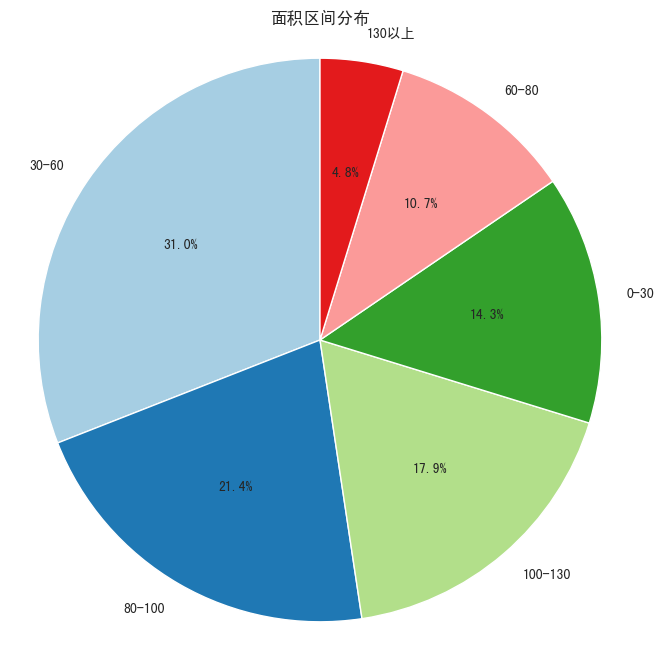

In [305]:
# 假设 file_data 是已经处理好的 DataFrame
# 创建面积区间
bins = [0, 30, 60, 80, 100, 130, float('inf')]  # 定义区间
labels = ['0-30', '30-60', '60-80', '80-100', '100-130', '130以上']  # 区间标签

# 将面积数据分组到区间
file_data['Area Range'] = pd.cut(file_data['Area'], bins=bins, labels=labels, right=False)

# 统计各区间数量
area_distribution = file_data['Area Range'].value_counts()

# 打印面积区间分布
print("\n面积区间分布：")
print(area_distribution)

# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(area_distribution, labels=area_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('面积区间分布')
plt.axis('equal')  # 使饼图为圆形
plt.show()


### 3.3 划分价格区间并可视化

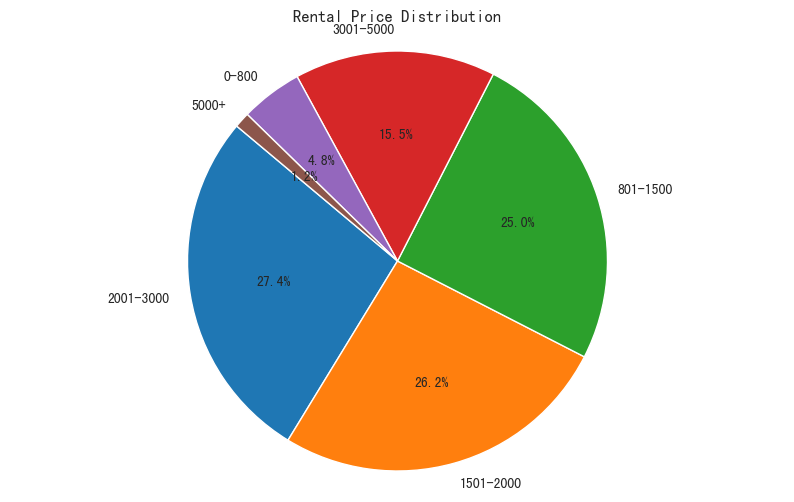

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 file_data 是已经处理好的 DataFrame，且 Price 列为浮点数类型
# 定义价格区间
price_bins = [0, 800, 1500, 2000, 3000, 5000, float('inf')]  # 定义区间
price_labels = ['0-800', '801-1500', '1501-2000', '2001-3000', '3001-5000', '5000+']

# 使用 pd.cut() 划分价格区间
file_data['Price Range'] = pd.cut(file_data['Price'], bins=price_bins, labels=price_labels)

# 统计每个区间的数量
price_distribution = file_data['Price Range'].value_counts()

# 绘制饼状图
plt.figure(figsize=(10, 6))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rental Price Distribution')
plt.axis('equal')  # 使饼图为圆形
plt.show()


### 3.4 划分每平方米平均租金分布并可视化

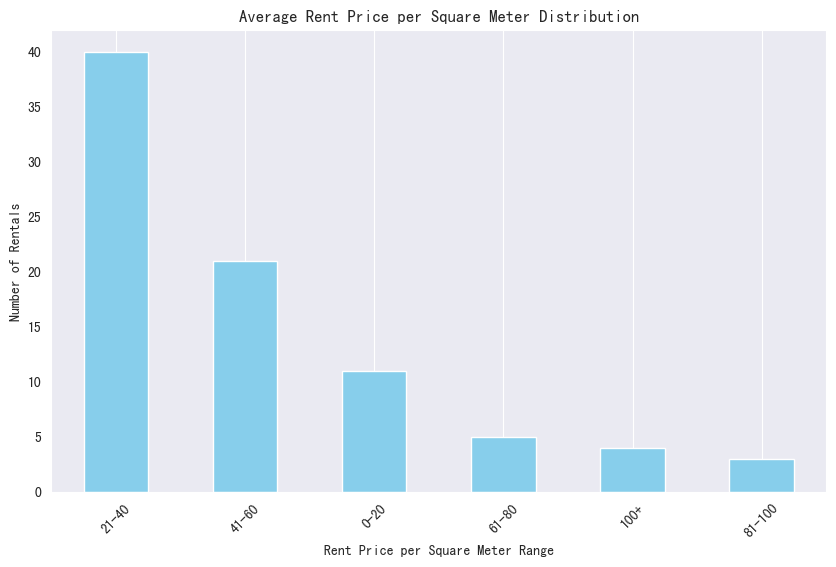

In [308]:
# 假设 file_data 是已经处理好的 DataFrame，且包含 'Price' 和 'Area' 列

# 计算每平方米的租金
file_data['Price per Sqm'] = file_data['Price'] / file_data['Area']

# 定义每平方米租金的区间
sqm_bins = [0, 20, 40, 60, 80, 100, float('inf')]  # 定义区间
sqm_labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']

# 使用 pd.cut() 划分每平方米租金的区间
file_data['Price per Sqm Range'] = pd.cut(file_data['Price per Sqm'], bins=sqm_bins, labels=sqm_labels)

# 统计每个区间的数量
sqm_distribution = file_data['Price per Sqm Range'].value_counts()

# 绘制柱状图
plt.figure(figsize=(10, 6))
sqm_distribution.plot(kind='bar', color='skyblue')
plt.title('Average Rent Price per Square Meter Distribution')
plt.xlabel('Rent Price per Square Meter Range')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
